In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import seaborn as sns

In [2]:
musiclist = pd.read_csv(r'/Users/simgesargin/Desktop/Bootcamp/df_audio_features_1000')
musiclist.head(3)

,name,artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,id,html
0,All Shook Up,Elvis Presley,0.624,0.468,10,-12.162,1,0.1320,0.881,0.000006,0.144,0.952,74.139,NaN,117080,4,5ueyLj6e6oVaTY0KQ6yLaA,https://open.spotify.com/track/5ueyLj6e6oVaTY0...
1,I've Got You Under My Skin - Remastered 1998,Frank Sinatra,0.585,0.247,1,-12.612,1,0.0400,0.452,0.000009,0.107,0.591,127.150,NaN,223760,4,3aEJMh1cXKEjgh52claxQp,https://open.spotify.com/track/3aEJMh1cXKEjgh5...
2,Smoke Gets In Your Eyes,The Platters,0.290,0.227,3,-13.060,1,0.0311,0.944,0.000079,0.617,0.224,114.278,NaN,157293,4,307XEC1IUwUs9ojlEFwH7f,https://open.spotify.com/track/307XEC1IUwUs9oj...


In [3]:
musiclist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1440 non-null   object 
 1   artist            1440 non-null   object 
 2   danceability      1440 non-null   float64
 3   energy            1440 non-null   float64
 4   key               1440 non-null   int64  
 5   loudness          1440 non-null   float64
 6   mode              1440 non-null   int64  
 7   speechiness       1440 non-null   float64
 8   acousticness      1440 non-null   float64
 9   instrumentalness  1440 non-null   float64
 10  liveness          1440 non-null   float64
 11  valence           1440 non-null   float64
 12  tempo             1440 non-null   float64
 13  type              0 non-null      float64
 14  duration_ms       1440 non-null   int64  
 15  time_signature    1440 non-null   int64  
 16  id                1440 non-null   object 


In [5]:
musiclist_id = (
musiclist
    .assign(
        name_artist_id = lambda x: x['name'] + ' - ' + x['artist'] + ' - ' + x['id']
    )
    .set_index('name_artist_id')
    .filter([
            'danceability', 'energy','key', 'loudness','mode' 'speechiness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 
            'tempo','type','duration_ms','time_signature'
            ])
    )
musiclist_id.shape

(1440, 12)

In [8]:
from sklearn.preprocessing import MinMaxScaler
musiclist_norm = MinMaxScaler().fit_transform(musiclist_id)
musiclist_norm = pd.DataFrame(musiclist_norm, index=musiclist_id.index, columns=musiclist_id.columns) 
musiclist_norm[:5]


/Users/simgesargin/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:464: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/Users/simgesargin/opt/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:465: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
name_artist_id,,,,,,,,,,,,
All Shook Up - Elvis Presley - 5ueyLj6e6oVaTY0KQ6yLaA,0.624060,0.469869,0.909091,0.708800,0.884538,0.000006,0.127865,0.965817,0.156106,NaN,0.014474,0.75
I've Got You Under My Skin - Remastered 1998 - Frank Sinatra - 3aEJMh1cXKEjgh52claxQp,0.580938,0.247977,0.090909,0.698907,0.453814,0.000009,0.089495,0.591879,0.494567,NaN,0.042899,0.75
Smoke Gets In Your Eyes - The Platters - 307XEC1IUwUs9ojlEFwH7f,0.254755,0.227896,0.272727,0.689059,0.947791,0.000081,0.618376,0.211726,0.412383,NaN,0.025189,0.75
"What'd I Say, Pt. 1 & 2 - Ray Charles - 5yQ9iMZXGcr5rlO4hoLsP4",0.531181,0.683728,0.363636,0.856565,0.811245,0.000000,0.146531,0.802155,0.247063,NaN,0.065093,0.75
Dream A Little Dream Of Me - Ella Fitzgerald - 3vFVS2WYHDG4KkWCNecvpn,0.437196,0.167654,0.000000,0.676903,0.921687,0.000000,0.157938,0.398177,0.168742,NaN,0.032589,0.75


In [12]:
musiclist_norm.drop(['type'], axis=1, inplace=True)

In [18]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=7)
kmeans.fit(musiclist_norm)

KMeans(n_clusters=7)

In [19]:
kmeans.cluster_centers_

array([[0.45617188, 0.77077788, 0.48187073, 0.84353457, 0.07113013,
        0.11374287, 0.22417531, 0.29480906, 0.5644721 , 0.05939535,
        0.71531792],
       [0.50770359, 0.30335531, 0.12951432, 0.68248905, 0.78626786,
        0.04781776, 0.14509496, 0.4349684 , 0.36977853, 0.05054802,
        0.72431507],
       [0.71643821, 0.69433862, 0.16262976, 0.82368534, 0.18696124,
        0.02638353, 0.14623226, 0.72080705, 0.44181024, 0.04279268,
        0.74913495],
       [0.74074389, 0.68830769, 0.76716808, 0.83268388, 0.13552828,
        0.02839571, 0.14856566, 0.66954839, 0.40557708, 0.04498356,
        0.75      ],
       [0.24139093, 0.15794665, 0.45630726, 0.5165707 , 0.9012365 ,
        0.85122969, 0.13588159, 0.13307172, 0.33420688, 0.11801181,
        0.68604651],
       [0.29215215, 0.16579336, 0.62472727, 0.60601051, 0.91114036,
        0.05340436, 0.18156341, 0.16326414, 0.3595448 , 0.05621121,
        0.668     ],
       [0.57519573, 0.48788266, 0.68102073, 0.76151005, 0.

In [25]:
musiclist_cc = pd.DataFrame(kmeans.cluster_centers_)
musiclist_cc.columns = ['danceability', 'energy','key', 'loudness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 
            'tempo','duration_ms','time_signature']
musiclist_cc

,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.456172,0.770778,0.481871,0.843535,0.071130,0.113743,0.224175,0.294809,0.564472,0.059395,0.715318
1,0.507704,0.303355,0.129514,0.682489,0.786268,0.047818,0.145095,0.434968,0.369779,0.050548,0.724315
2,0.716438,0.694339,0.162630,0.823685,0.186961,0.026384,0.146232,0.720807,0.441810,0.042793,0.749135
3,0.740744,0.688308,0.767168,0.832684,0.135528,0.028396,0.148566,0.669548,0.405577,0.044984,0.750000
4,0.241391,0.157947,0.456307,0.516571,0.901236,0.851230,0.135882,0.133072,0.334207,0.118012,0.686047
5,0.292152,0.165793,0.624727,0.606011,0.911140,0.053404,0.181563,0.163264,0.359545,0.056211,0.668000
6,0.575196,0.487883,0.681021,0.761510,0.666484,0.041383,0.165071,0.654781,0.465002,0.044753,0.732456


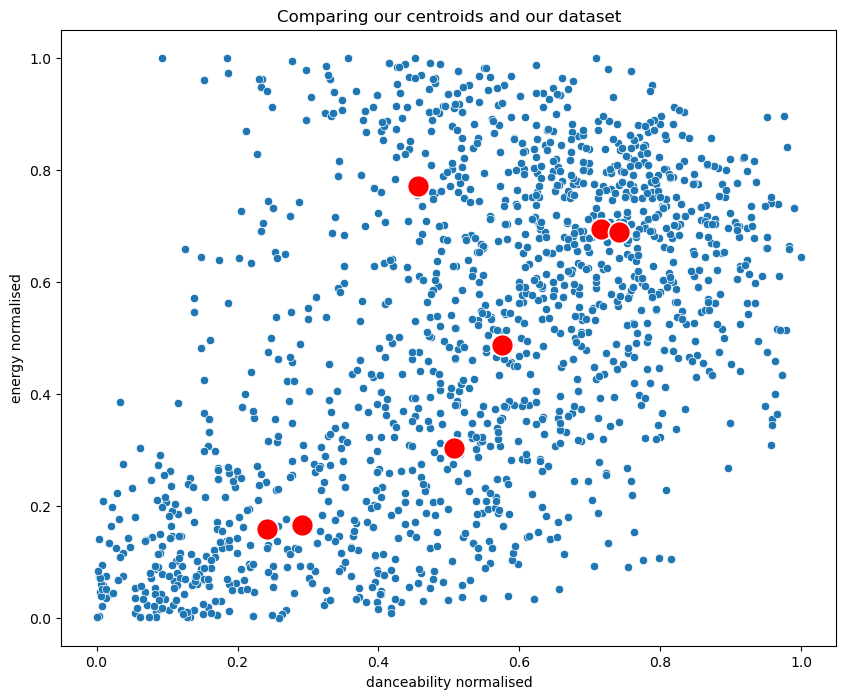

In [28]:
fig, ax = plt.subplots(figsize=(10, 8))
plot_musiclist = pd.DataFrame(musiclist_norm)
plot_musiclist.columns = ['danceability', 'energy','key', 'loudness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 
            'tempo','duration_ms','time_signature']

plt.title('Comparing our centroids and our dataset')
plt.xlabel('danceability normalised')
plt.ylabel('energy normalised')
sns.scatterplot(data=plot_musiclist, x='danceability', y='energy')
sns.scatterplot(data=musiclist_cc, x='danceability', y='energy', color='red', s=250)
plt.show()

In [30]:
kmeans.predict(musiclist_norm)

array([6, 1, 5, ..., 4, 4, 4], dtype=int32)

In [31]:
musiclist_id['cluster'] = kmeans.labels_
musiclist_id.sample(5)

,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature,cluster
name_artist_id,,,,,,,,,,,,,
In The Room - Lexi - 0Toq1jVrrLqQXUGh2Kcn1p,0.551,0.651,6,-3.679,0.589,0.000000,0.1880,0.174,104.254,NaN,252375,4,6
You Be Killin Em - Fabolous - 5I6YA7oHtraxwWQzzCugDt,0.664,0.909,6,-3.552,0.444,0.000000,0.5250,0.557,93.977,NaN,209693,4,3
Bye Bye Love - The Everly Brothers - 1j7HyD3cxyYw9bMFevxWyR,0.558,0.556,9,-8.358,0.684,0.000000,0.0869,0.905,169.259,NaN,144300,4,6
Move It - 2002 Remaster - Cliff Richard & The Drifters - 4vDEkER6ToECKrxiPzE2Tp,0.625,0.852,4,-4.830,0.692,0.000487,0.2930,0.931,82.142,NaN,141813,4,6
i'm so tired... - Lauv - 7COXchtUOMd6uIT6HvmRaI,0.599,0.733,11,-7.058,0.176,0.000000,0.2420,0.534,102.211,NaN,162583,4,3


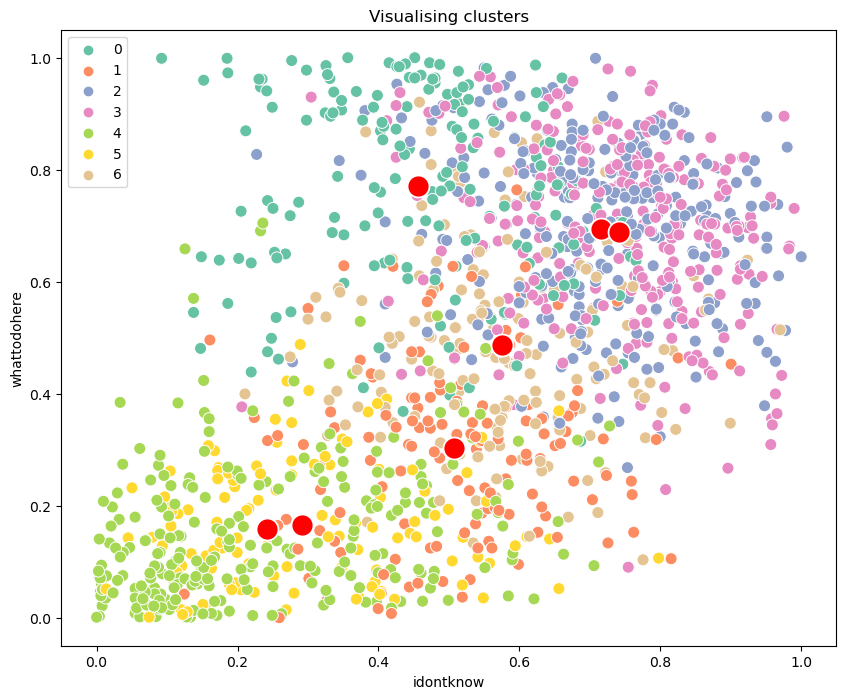

In [32]:
# create plot dataframe
plot_musiclist = pd.DataFrame(musiclist_norm)
plot_musiclist.columns = ['danceability', 'energy','key', 'loudness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 
            'tempo','duration_ms','time_signature']
plot_musiclist['cluster'] = kmeans.labels_

# size and plot titles
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Visualising clusters')
plt.xlabel('idontknow')
plt.ylabel('whattodohere')

# scatter plot
sns.scatterplot(data=plot_musiclist, x='danceability', y='energy', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=musiclist_cc, x='danceability', y='energy', color='red', s=250)
plt.show()

In [33]:
musiclist_all = musiclist_id[['danceability', 'energy','key', 'loudness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 
            'tempo','duration_ms','time_signature']]
musiclist_all.head()

,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
name_artist_id,,,,,,,,,,,
All Shook Up - Elvis Presley - 5ueyLj6e6oVaTY0KQ6yLaA,0.624,0.468,10,-12.162,0.881,0.000006,0.144,0.952,74.139,117080,4
I've Got You Under My Skin - Remastered 1998 - Frank Sinatra - 3aEJMh1cXKEjgh52claxQp,0.585,0.247,1,-12.612,0.452,0.000009,0.107,0.591,127.150,223760,4
Smoke Gets In Your Eyes - The Platters - 307XEC1IUwUs9ojlEFwH7f,0.290,0.227,3,-13.060,0.944,0.000079,0.617,0.224,114.278,157293,4
"What'd I Say, Pt. 1 & 2 - Ray Charles - 5yQ9iMZXGcr5rlO4hoLsP4",0.540,0.681,4,-5.440,0.808,0.000000,0.162,0.794,88.385,307053,4
Dream A Little Dream Of Me - Ella Fitzgerald - 3vFVS2WYHDG4KkWCNecvpn,0.455,0.167,0,-13.613,0.918,0.000000,0.173,0.404,76.118,185067,4


In [36]:
from sklearn.preprocessing import StandardScaler
musiclist_all_norm = StandardScaler().fit_transform(musiclist_all)

kmeans_all = KMeans(n_clusters=3)
kmeans_all.fit(musiclist_all_norm)

KMeans(n_clusters=3)

In [37]:
kmeans_all.cluster_centers_

array([[ 5.66527911e-01,  7.29484937e-01,  1.02440715e-02,
         6.39448047e-01, -7.40950544e-01, -4.25705621e-01,
         6.47322088e-02,  5.31748100e-01,  2.06707490e-01,
        -2.49433369e-01,  2.22299389e-01],
       [-1.29091810e+00, -1.23679083e+00, -2.99428965e-02,
        -1.50207658e+00,  1.14440134e+00,  1.76086440e+00,
        -1.07368870e-01, -1.21570527e+00, -4.70254962e-01,
         9.88203104e-01, -4.59671682e-01],
       [-3.19751847e-01, -7.23487388e-01, -9.45265899e-04,
        -3.27933875e-01,  8.16804776e-01, -3.39236012e-01,
        -6.59440826e-02, -2.97162826e-01, -1.17223015e-01,
        -1.66863811e-01, -1.59813050e-01]])

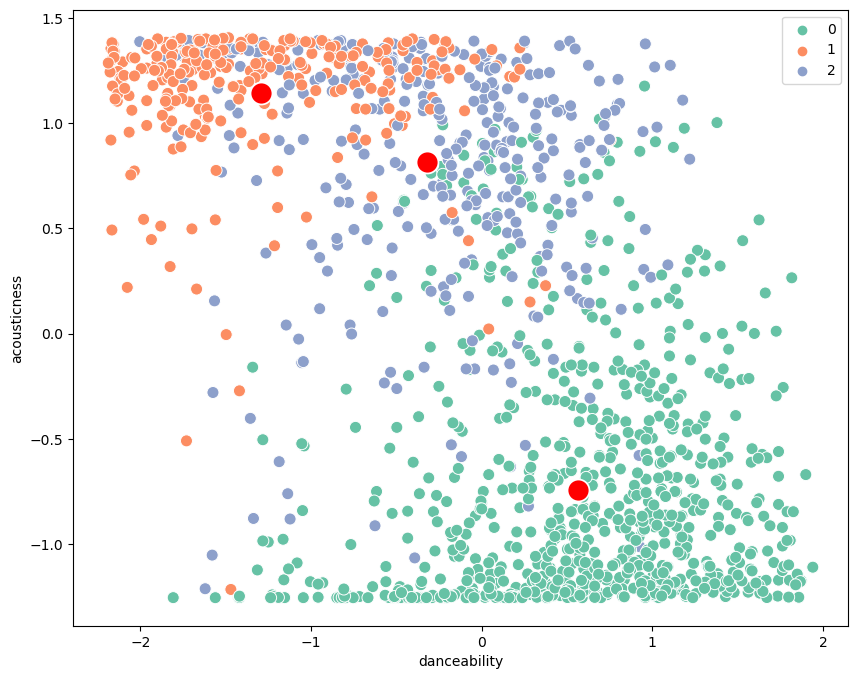

In [54]:
musiclist_cc = pd.DataFrame(kmeans_all.cluster_centers_)
musiclist_cc.columns = ['danceability', 'energy','key', 'loudness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 
            'tempo','duration_ms','time_signature']
musiclist_cc

fig, ax = plt.subplots(figsize=(10, 8))

plot_musiclist = pd.DataFrame(musiclist_all_norm)
plot_musiclist.columns = ['danceability', 'energy','key', 'loudness',
            'acousticness', 'instrumentalness', 'liveness', 'valence', 
            'tempo','duration_ms','time_signature']
plot_musiclist['cluster'] = kmeans_all.labels_

sns.scatterplot(data=plot_musiclist, x='danceability', y='acousticness', hue='cluster', palette='Set2', s=75)
sns.scatterplot(data=musiclist_cc, x='danceability', y='acousticness', color='red', s=250)
plt.show()

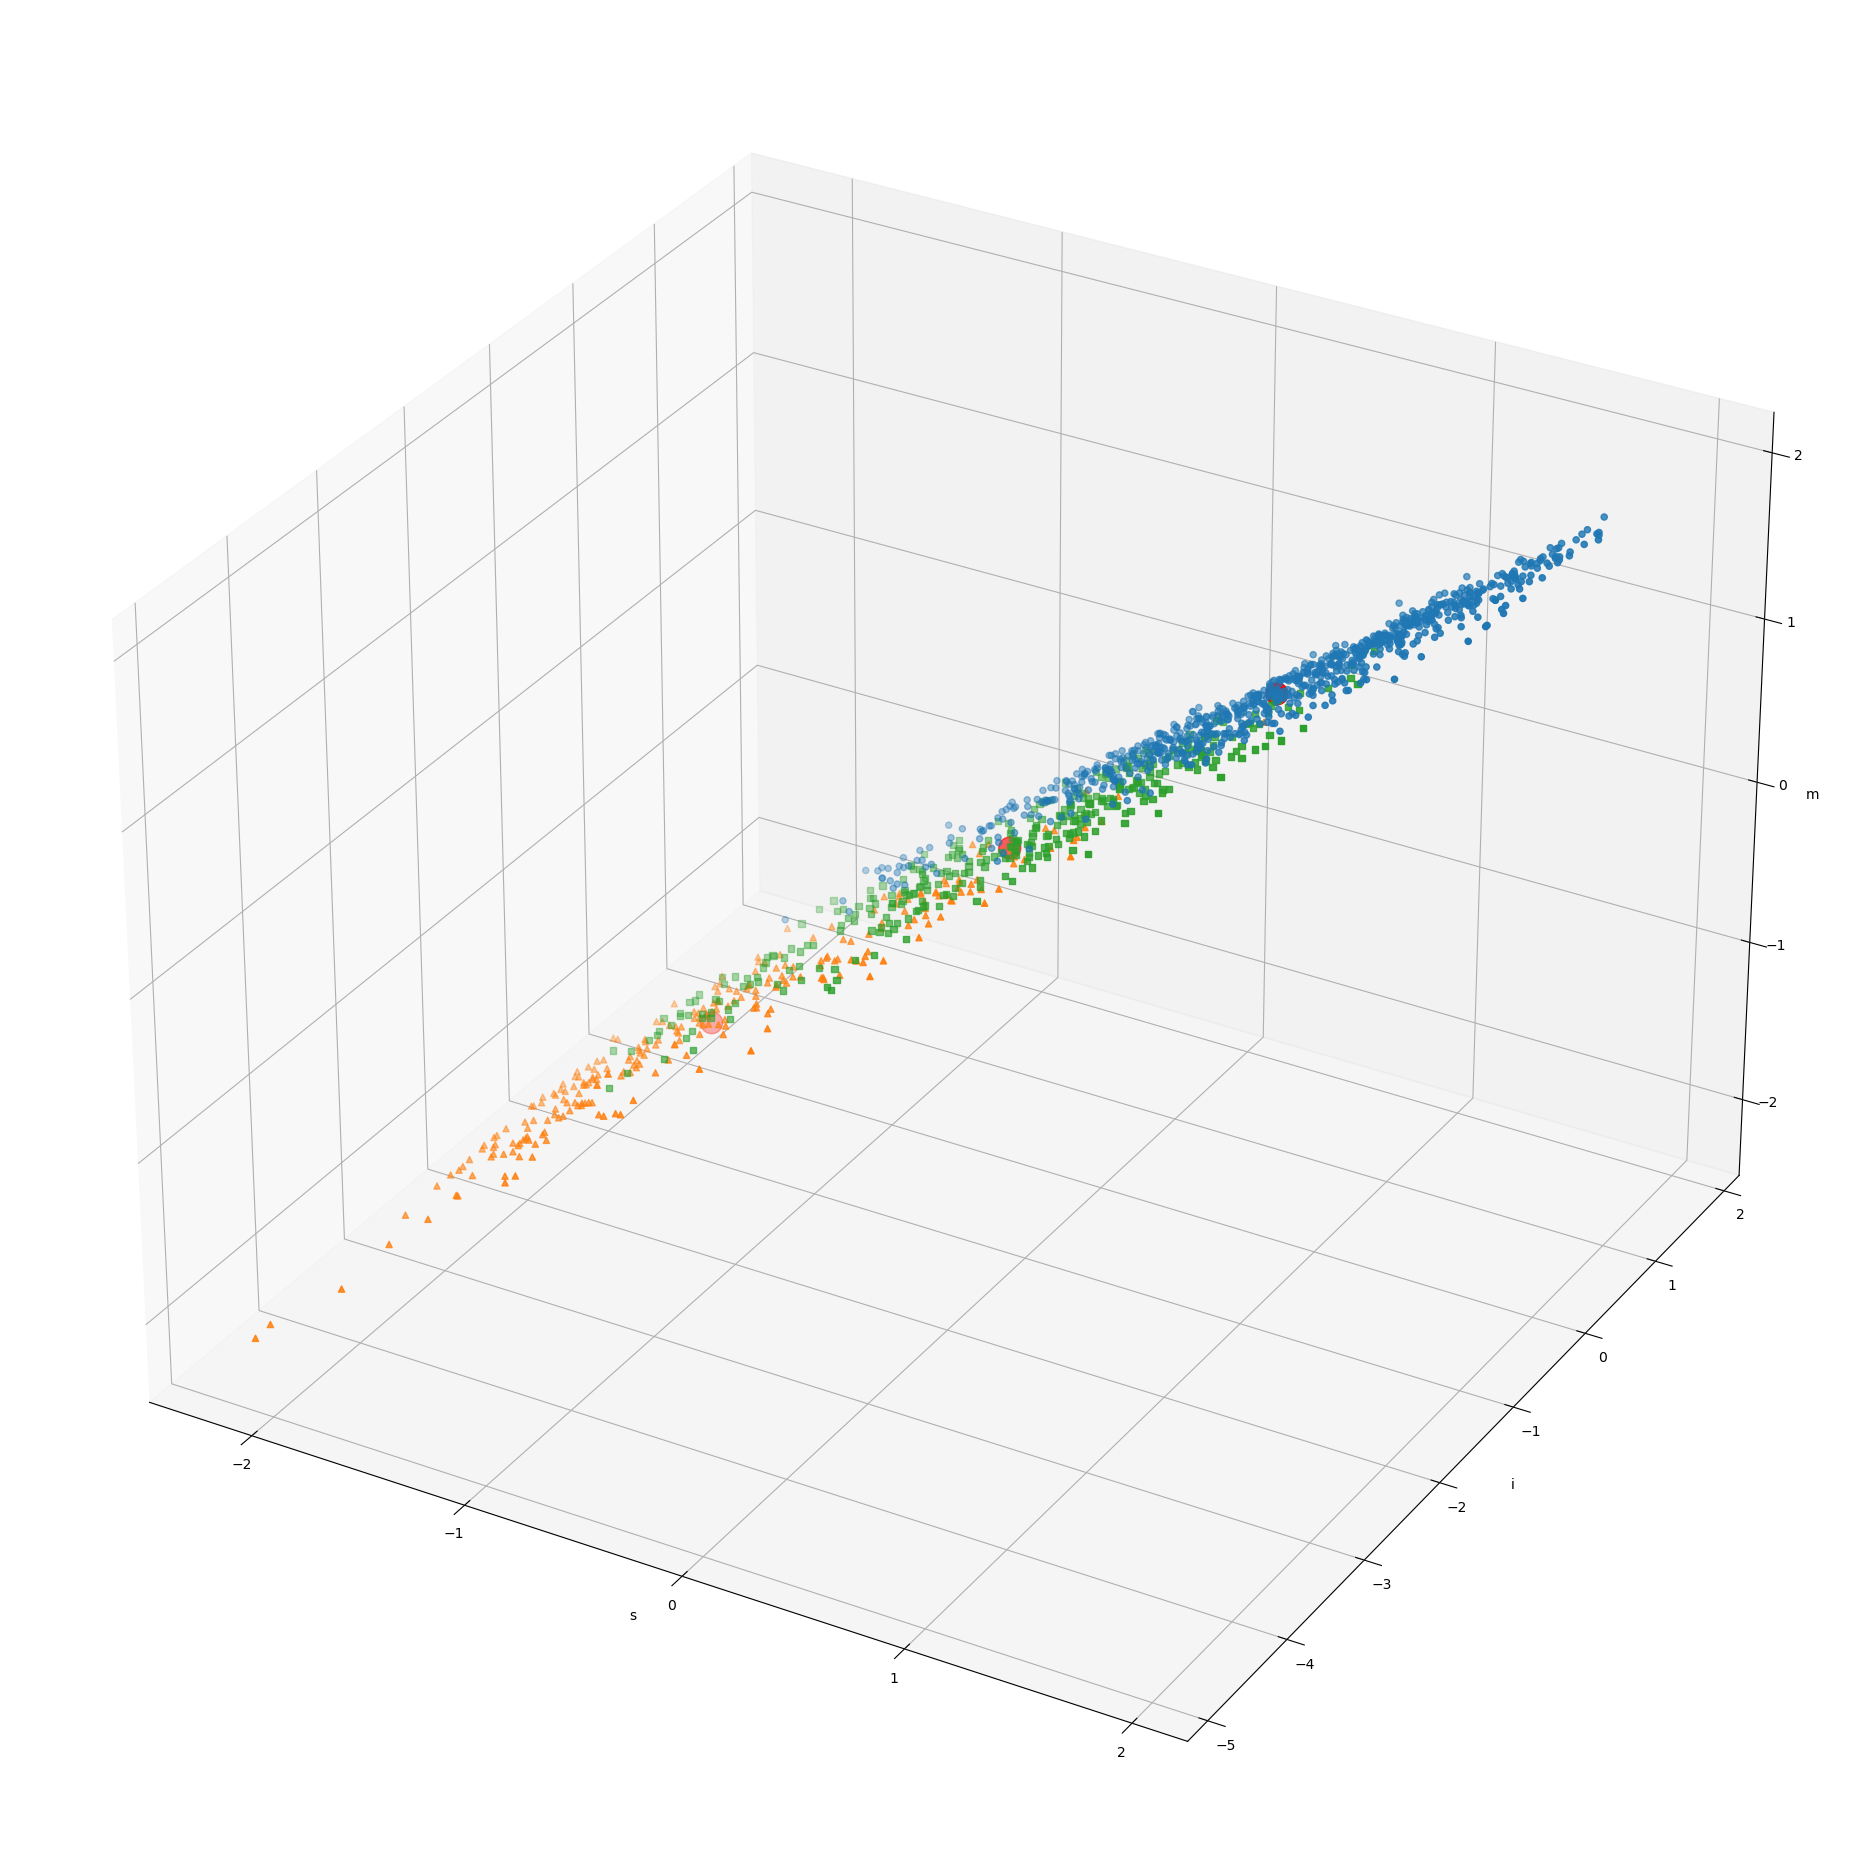

In [44]:
import matplotlib.pyplot as plt
import random
colors = ['r','g','b']
markers = ['o', '^','s']
fig = plt.figure(figsize=(26, 24))
ax = fig.add_subplot(projection='3d')

# ax.scatter(plot_data['bill_depth_mm'], plot_data['bill_length_mm'], plot_data['flipper_length_mm'])
for marker, d in plot_musiclist.groupby('cluster'):
    ax.scatter(d['danceability'], d['loudness'], d['danceability'], marker=markers[marker], label=d['cluster'])
ax.scatter(musiclist_cc['danceability'], musiclist_cc['loudness'],musiclist_cc['danceability'], color='red', s=250)
ax.set_xlabel('s')
ax.set_ylabel('i')
ax.set_zlabel('m')
plt.show()

In [48]:
from sklearn.metrics.pairwise import euclidean_distances

musiclist_distances = euclidean_distances(musiclist_all_norm)
# transform to a dataframe
musiclist_distances = pd.DataFrame(musiclist_distances, index=musiclist_id.index, columns=musiclist_id.index)
musiclist_distances[:3]

name_artist_id,All Shook Up - Elvis Presley - 5ueyLj6e6oVaTY0KQ6yLaA,I've Got You Under My Skin - Remastered 1998 - Frank Sinatra - 3aEJMh1cXKEjgh52claxQp,Smoke Gets In Your Eyes - The Platters - 307XEC1IUwUs9ojlEFwH7f,"What'd I Say, Pt. 1 & 2 - Ray Charles - 5yQ9iMZXGcr5rlO4hoLsP4",Dream A Little Dream Of Me - Ella Fitzgerald - 3vFVS2WYHDG4KkWCNecvpn,That'll Be The Day - Buddy Holly - 50RwvvEKX5Q7AZt8FTAwIF,Blueberry Hill - Fats Domino - 06PdA0DLgF4BfAeUNZAbFG,Mack the Knife - Bobby Darin - 3E5ndyOfO6vFDEIE42HA8o,All I Have to Do Is Dream - The Everly Brothers - 72nqbbrKjhXmDdRXQGq115,Sea Of Love - Phil Phillips - 14T8UhqU8EaJpp3tRxqJbr,...,"Symphony No. 3 - ""Chant de la nuit"", Op. 27: Largo... - Karol Szymanowski - 6VZ0CYMRhrdprO6u9rMwxC","Pines Of Rome, P. 141: 3. The Pines Of The Janiculum - Ottorino Respighi - 09R0O5z1MZR7s2vbNlDKTG","Don Giovanni, K.527: Overture - Wolfgang Amadeus Mozart - 02GgkjgUsnDcgQCL0JQfG3","Music for Strings, Percussion and Celesta, BB 114: II. Allegro - Béla Bartók - 67nERYyvMwe3dUQZXpUvDo",A Flock Descends Into The Pentagonal Garden - Toru Takemitsu - 0dv5IADhMkI6ZJuSC2gtJ2,"1812 Festival Overture, Op. 49: 1812 Overture, Op. 49 - Pyotr Ilyich Tchaikovsky - 1aEhYlZtypmipA06SDJ4U3","Winter Fragments pour ensemble instrumental, sons de synthèse et dispositif électronique - Tristan Murail - 1Gfqe7TAKklmuZf6hxsH6h","Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3 Farben (Colours) - Arnold Schoenberg - 2XNwnFrdMDpismp0VUZ7cU","Serenade For Strings In E, Op.22, B. 52: 1. Moderato - Antonín Dvořák - 7ucDwgMtE3YJtEfTbuRhy0","Ravel: Boléro, M. 81 - Maurice Ravel - 7E1ErYYCn0lYjHODZ1qGuB"
name_artist_id,,,,,,,,,,,,,,,,,,,,,
All Shook Up - Elvis Presley - 5ueyLj6e6oVaTY0KQ6yLaA,0.000000,3.619304,5.055665,2.402485,3.678322,3.068508,3.076488,2.719978,2.398799,2.890107,...,4.795749,6.053164,4.838499,4.926609,6.144535,6.435635,5.607215,7.277036,5.411182,6.022047
I've Got You Under My Skin - Remastered 1998 - Frank Sinatra - 3aEJMh1cXKEjgh52claxQp,3.619304,0.000000,4.237261,2.714875,2.311900,1.821159,3.961550,2.164368,1.565209,3.006956,...,4.065714,5.121410,3.203974,4.732449,5.442883,5.344258,4.844363,7.245701,4.711789,5.533548
Smoke Gets In Your Eyes - The Platters - 307XEC1IUwUs9ojlEFwH7f,5.055665,4.237261,0.000000,4.477440,3.529887,4.793843,5.212093,3.526110,3.752062,3.429564,...,4.204889,5.442452,4.490307,5.530154,5.674211,5.921102,5.406417,7.235671,4.895979,5.529291


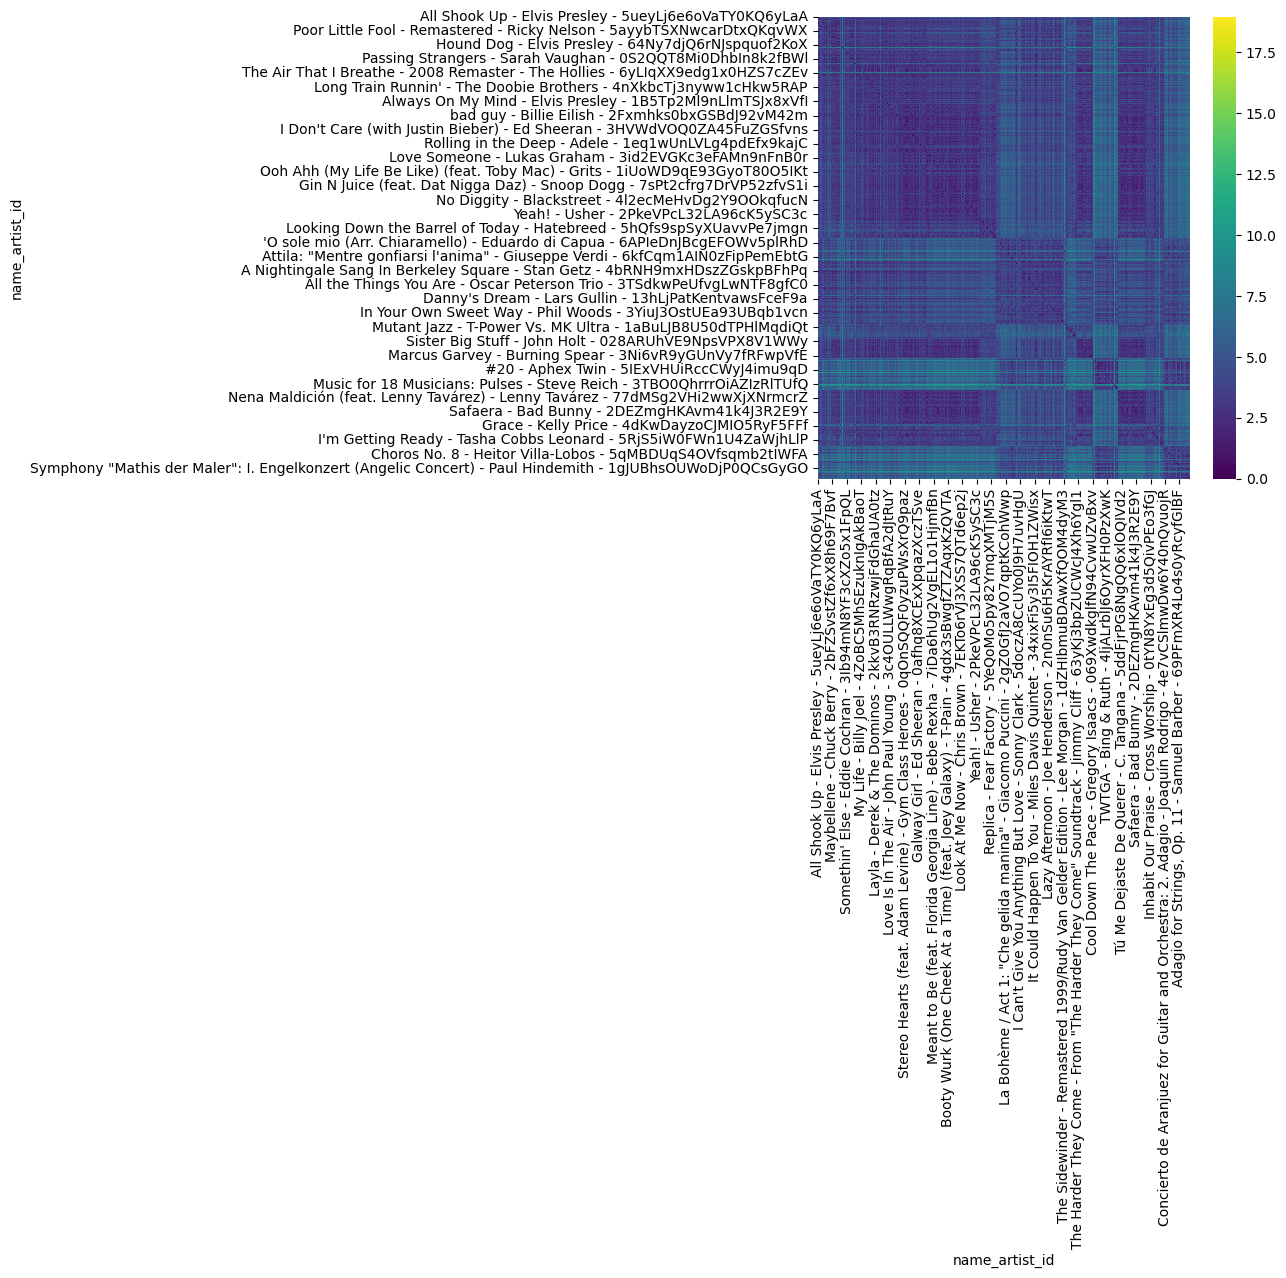

In [49]:
# show it to me into a nice heatmap
plt.figure(figsize=(6,6))
sns.heatmap(musiclist_distances, cmap='viridis')
plt.show()

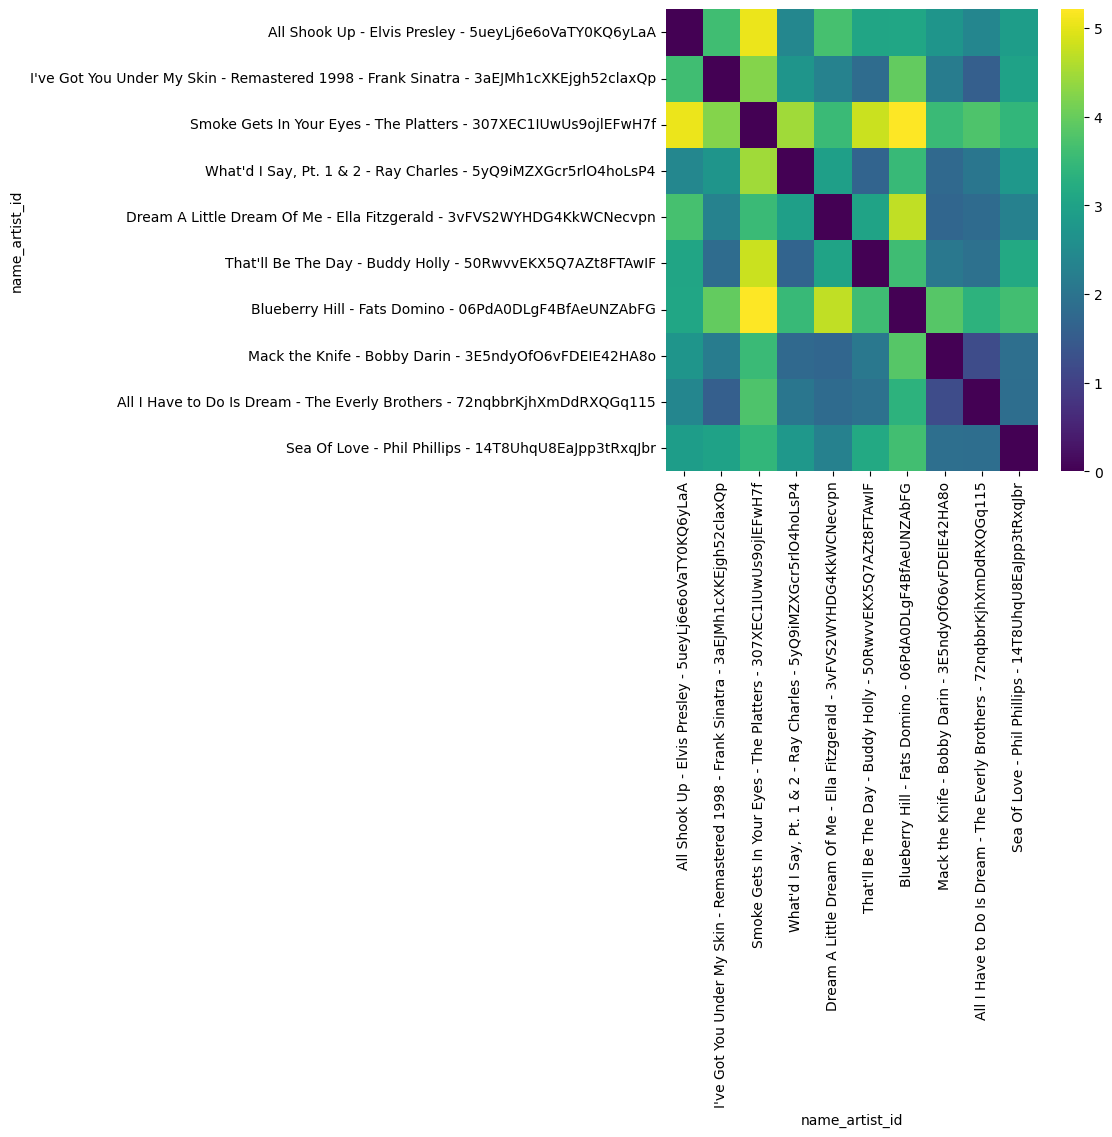

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a specific range of rows and columns from musiclist_distances DataFrame
subset = musiclist_distances.iloc[:10, :10]  # select first 10 rows and columns

plt.figure(figsize=(6, 6))
sns.heatmap(subset, cmap='viridis')
plt.show()

In [53]:
musiclist_id.groupby(by=['cluster']).mean()


,danceability,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,type,duration_ms,time_signature
cluster,,,,,,,,,,,,
0,0.472162,0.767699,5.300578,-6.032769,0.070848,0.112037,0.236872,0.304209,138.098879,NaN,285670.473988,3.861272
1,0.518767,0.302156,1.424658,-13.358890,0.783123,0.047100,0.160615,0.439518,107.605192,NaN,252466.198630,3.897260
2,0.707547,0.691567,1.788927,-6.935730,0.186215,0.025988,0.161712,0.715467,118.887087,NaN,223360.186851,3.996540
3,0.729529,0.685561,8.438849,-6.526378,0.134988,0.027970,0.163962,0.665982,113.212104,NaN,231582.589928,4.000000
4,0.277914,0.157332,5.019380,-20.906682,0.897632,0.838461,0.151731,0.148067,102.033818,NaN,505659.728682,3.744186
5,0.323822,0.165147,6.872000,-16.837976,0.907496,0.052603,0.195782,0.177215,106.002344,NaN,273720.304000,3.672000
6,0.579807,0.485942,7.491228,-9.764146,0.663819,0.040762,0.179878,0.651725,122.519532,NaN,230717.339181,3.929825


In [ ]:
#Explore 
#Looking at the size of the clusters (how many observations do they have?)
#Plotting the distribution of an individual feature (such as “energy”) across different clusters.
#Visualizing the clusters in a scatterplot with two different features.
#Listening to a few songs from each cluster to get a feeling for what do these clusters contain.

#For the food rating data the question is how many tables can we create based on the food ratings? 
#Is K means good for creating playlists? Clear titles
#Charts with characteristics of playlists
#5000 sounds clustering second iteration???
#Create playlists ... 